# 96-well plate analysis:
## Graphical representation of two parameters

I need to create a plot that is mostly colorblind friendly that can display a 96-well plate that has two measured values.

Import relevant modules.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

Define the file name and import the relevant data from the file

In [2]:
test1 = "Test-linear-96-only.xlsx" 

df1 = pd.read_excel(test1, 'Sheet2') 

df1.head()

,Well,FL-T,FL-K
0,A1,10.000000,9.280000
1,A2,5.987886,1.009489
2,A3,6.725146,0.681101
3,A4,7.775689,5.509620
4,A5,7.456140,0.985164


Split the alpha-numberic representation of the wells into the labels for rows and wells.

The letters are always capitalized, so the regex phrase is simplified.

In [3]:
df1["Row"] = df1['Well'].str.extract('(^[A-Z])', expand = True) 

df1["Column"] = df1['Well'].str.extract('(\d{1,2}$)', expand = True)

df1.head(13)

,Well,FL-T,FL-K,Row,Column
0,A1,10.000000,9.280000,A,1
1,A2,5.987886,1.009489,A,2
2,A3,6.725146,0.681101,A,3
3,A4,7.775689,5.509620,A,4
4,A5,7.456140,0.985164,A,5
5,A6,8.757310,13.699858,A,6
6,A7,6.288638,11.114107,A,7
7,A8,8.485798,1.751402,A,8
8,A9,7.113617,0.958406,A,9
9,A10,6.246867,11.610338,A,10


In [4]:
# make sure that the type of all of the data are floats
df1[['Column','FL-T', 'FL-K']] = df1[['Column','FL-T', 'FL-K']].astype(float)

df1.dtypes

Well       object
FL-T      float64
FL-K      float64
Row        object
Column    float64
dtype: object

In [5]:
# to create series
Row = df1['Row']
Tops = df1['Column']
w = df1['FL-T']
z = df1["FL-K"]

Scale the data by the z-score to make the data more interpretable. Because we will use z2 as a size factor in the plot. Two was added to the z2 to make all of the values positive.

In [6]:
#w2 = w*3 # scaling factor for the size of the points on the graph later
w2 = ((df1['FL-T'] - df1['FL-T'].mean())/df1['FL-T'].std())

#z2 = z*3 # scaling factor for the size of the points on the graph later
z2 = (1.5+((df1["FL-K"] - df1["FL-K"].mean())/df1["FL-K"].std()))

print(w2.max(), w2.min())
print(z2.max(), z2.min())

3.210238635711515 -3.8733300816082017
5.318133860985826 0.497086147016091


Create plot. Comments are provided for code where necessary.

Fluorescence Turn-on (z-score): FL-T and FL-K


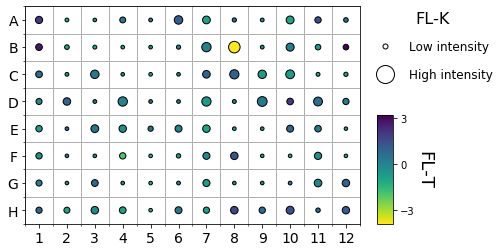

<Figure size 432x288 with 0 Axes>

In [24]:
print("Fluorescence Turn-on (z-score): FL-T and FL-K")

fig, ax = plt.subplots()

# To select color palette
cm = plt.cm.get_cmap('viridis_r')

# To define the type of plt
Sc_1 = plt.scatter('Column', 'Row', data = df1,
                c=w2, cmap=cm, 
                s=z2*25, marker='o', edgecolors='black')

# To set text size for ticklabels
ax.tick_params(labelsize=14)

# To reverse axis
ax.set_ylim(ax.get_ylim()[::-1])

# To design grid
ax.grid(which='major', color='white', linewidth = 0)
ax.grid(which='minor', linewidth = 1)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.set_axisbelow(True)

# To center the data
plt.xlim(0.5, 12.5)
plt.ylim(7.5, -0.5)

# At this point, the plot looks nice but no legend exists

# To plot the color bar
cb = inset_axes(ax,
                width="5%", height="50%", # width and height of parent_bbox
                loc='lower left', bbox_to_anchor=(1.05, 0., 1, 1),
                bbox_transform=ax.transAxes, borderpad=0)
fig.colorbar(Sc_1, cax=cb, ticks= [-3, 0, 3])
cb.set_ylabel('FL-T', fontsize = 18, rotation= 270, labelpad = 18)

# To plot size legend outside of the graph
legend_elements = [Line2D([0], [0], marker='o', color='black', label='Low intensity',
                          markerfacecolor='w', markersize=5, lw=0),
                  Line2D([0], [0], marker='o', color='black', label='High intensity',
                          markerfacecolor='w', markersize=18, lw=0)]

plt.legend(bbox_to_anchor=(-0.5, 2), loc=2, borderaxespad=0, # places the legend wrt the main plot
           handles=legend_elements, # uses the defined elements above for legend_elements
           handletextpad=1, labelspacing=1.2, 
           title="FL-K", title_fontsize = 16, fontsize = 12, frameon=False)


# to plot map
plt.show() 
plt.clf()
fig.savefig('test.png', bbox_inches = "tight")

I didn't want a plot title, so that is excluded. 

Based on the plot, it looks like samples B08 (preference for FL-K probe) and B12 (preference for FL-T probe) may be interesting extremes.